# Exercises in linear regression

## Exercise 1

Load in the "EnergyEfficiency.csv" data (on Moodle). It is data about energy efficiency of buildings, more specifically it is about predicting the heating load and cooling load of building based on a set of features about the buildings. It is retrieved from UCI Machine Learning Repository: [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency).

Answer the following questions:
1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.
2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?
3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?
4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).
5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?
6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.
7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
df = pd.read_csv("EnergyEfficiency.csv")
df.head()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### 1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.

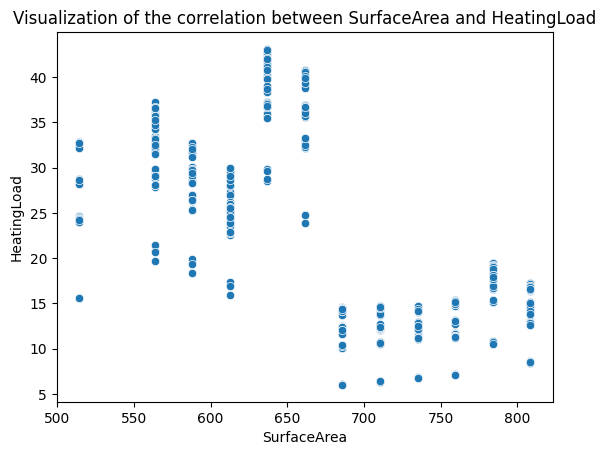

In [7]:
sns.scatterplot(data = df, x = "SurfaceArea", y = "HeatingLoad")
plt.title("Visualization of the correlation between SurfaceArea and HeatingLoad")
plt.savefig('corrplot.png')
plt.show()

In [8]:
stats.pearsonr(df["SurfaceArea"], df["HeatingLoad"])
#stats.spearmanr(df["SurfaceArea"], df["HeatingLoad"])

PearsonRResult(statistic=np.float64(-0.6581202267776216), pvalue=np.float64(1.6869072902149069e-96))

<Axes: xlabel='SurfaceArea', ylabel='HeatingLoad'>

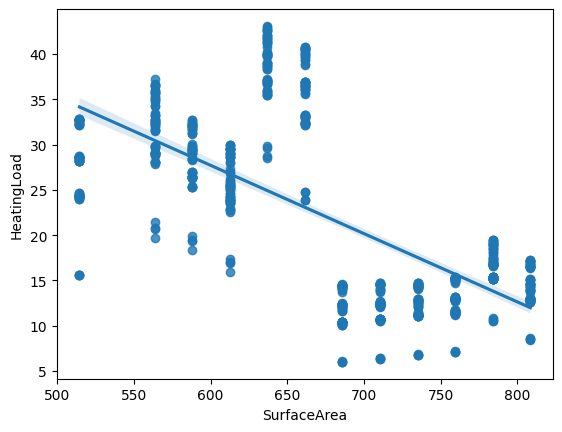

In [9]:
sns.regplot(data = df, x = "SurfaceArea", y = "HeatingLoad")

### 2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?

In [10]:
correlation, p_value = stats.pearsonr(df["SurfaceArea"], df["HeatingLoad"])
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -0.6581202267776216
P-value: 1.6869072902149069e-96


we can see that the coefficient is the negative, so we have a moderate negative correlation. and the p-value is super small so we can reject the null hypo, that there is no correlation. 

### 3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RelativeCompactness      768 non-null    float64
 1   SurfaceArea              768 non-null    float64
 2   WallArea                 768 non-null    float64
 3   RoofArea                 768 non-null    float64
 4   OverallHeight            768 non-null    float64
 5   Orientation              768 non-null    int64  
 6   GlazingArea              768 non-null    float64
 7   GlazingAreaDistribution  768 non-null    int64  
 8   HeatingLoad              768 non-null    float64
 9   CoolingLoad              768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


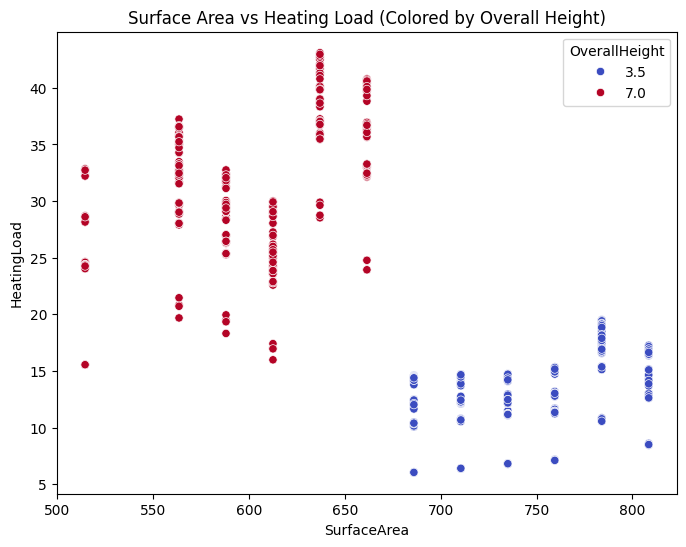

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="SurfaceArea", y="HeatingLoad", hue="OverallHeight", palette="coolwarm")
plt.title("Surface Area vs Heating Load (Colored by Overall Height)")
plt.show()

Taller buildings (7.0 height) have a smaller RoofArea-to-Volume ratio

Shorter buildings (3.5 height) have a larger RoofArea relative to volume

### 4 Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).

Intercept: 73.23360448627417
Coefficient: -0.07580337285068298
Mean Squared Error (MSE): 62.84823021204858
R-squared Score (R²): 0.39703256490466965


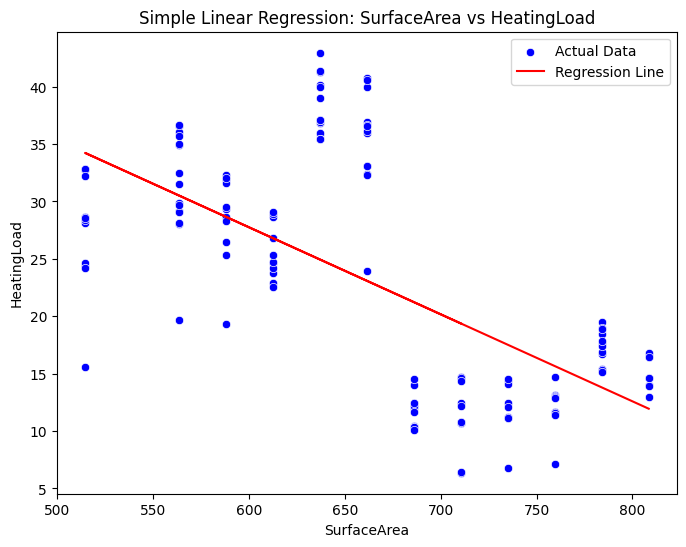

In [13]:
# Define Independent (X) and Dependent (y) Variables
X = df[["SurfaceArea"]]  # X should be 2D for sklearn
y = df["HeatingLoad"]     # y is the target variable

# Split Data into Train & Test Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Get Model Parameters
intercept = model.intercept_
coefficient = model.coef_[0]

print(f"Intercept: {intercept}")
print(f"Coefficient: {coefficient}")

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")

# Scatter Plot with Regression Line
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test.values.flatten(), y=y_test, label="Actual Data", color="blue")
plt.plot(X_test, y_pred, color="red", label="Regression Line")  # Regression line
plt.xlabel("SurfaceArea")
plt.ylabel("HeatingLoad")
plt.title("Simple Linear Regression: SurfaceArea vs HeatingLoad")
plt.legend()
plt.show()

### 5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?


it telle us that Coefficient: -0.07580337285068298. so when surface area incress with 1 y falls with  -0.07580337285068298

In [14]:
print("Coefficient:" + str(coefficient))

Coefficient:-0.07580337285068298


### 6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.


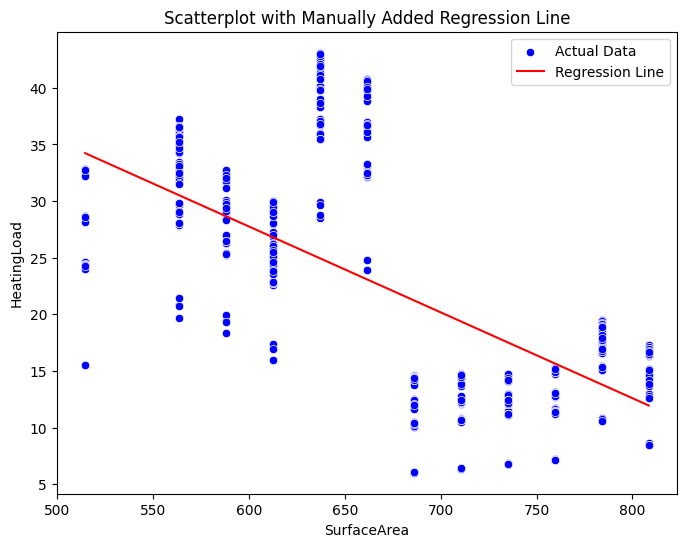

In [15]:
y_pred = intercept + coefficient * df["SurfaceArea"] # y = a + b*x

# Create scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["SurfaceArea"], y=df["HeatingLoad"], color="blue", label="Actual Data")

# Add regression line using actual SurfaceArea values
plt.plot(df["SurfaceArea"], y_pred, color="red", label="Regression Line")

# Labels, title, and legend
plt.xlabel("SurfaceArea")
plt.ylabel("HeatingLoad")
plt.title("Scatterplot with Manually Added Regression Line")
plt.legend()
plt.show()

### 7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

R² explains how much of the variation in HeatingLoad is explained by SurfaceArea.
R² = 0.397 means that only 39.7% of the variation in HeatingLoad is explained by SurfaceArea alone.
This is relatively low, suggesting that SurfaceArea alone is not a strong predictor of HeatingLoad.
The remaining 60.3% of the variation must be due to other factors like OverallHeight, RoofArea, insulation, window area, etc.


The model captures some relationship (R² > 0 means there is some predictive power).

## Exercise 2

In this exercise, we will continue from Exercise 1 and keep using the "EnergyEfficiency.csv" data (on Moodle).

Answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?
3. Check each of the assumptions/problems for linear regression.

### 1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RelativeCompactness      768 non-null    float64
 1   SurfaceArea              768 non-null    float64
 2   WallArea                 768 non-null    float64
 3   RoofArea                 768 non-null    float64
 4   OverallHeight            768 non-null    float64
 5   Orientation              768 non-null    int64  
 6   GlazingArea              768 non-null    float64
 7   GlazingAreaDistribution  768 non-null    int64  
 8   HeatingLoad              768 non-null    float64
 9   CoolingLoad              768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
# Define feature variables (X) and target variable (y)
X = df[["SurfaceArea", "CoolingLoad"]]  # Selecting two features
y = df["HeatingLoad"]

# Split data into training and testing sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model parameters
intercept = model.intercept_
coefficients = model.coef_

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

y_pred = model.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")

Intercept: -2.9897517482135
Coefficients: [-1.69917447e-04  1.03475984e+00]
Mean Squared Error (MSE): 5.3542352577111005
R-squared Score (R²): 0.9486313379176089


In [ ]:
# Define feature variables (X) and target variable (y)
X = df[["SurfaceArea", "WallArea", "RoofArea", "OverallHeight","CoolingLoad"]]  
y = df["HeatingLoad"]

# Split data into training and testing sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model parameters
intercept = model.intercept_
coefficients = model.coef_

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")  # Will print an array of coefficients for each variable

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")

Intercept: -4.5462862859719735
Coefficients: [ 1.42257099e+11 -1.42257099e+11 -2.84514197e+11  3.82436752e-01
  9.10896301e-01]
Mean Squared Error (MSE): 4.822015970812935
R-squared Score (R²): 0.9537374625808891


In [19]:
# Select all features except HeatingLoad
X = df.drop(columns=["HeatingLoad"])
y = df["HeatingLoad"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model parameters
intercept = model.intercept_
coefficients = model.coef_

print(f"Intercept: {intercept}")
print("Feature Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")


Intercept: 6.765287501435921
Feature Coefficients:
RelativeCompactness: -10.315405609629961
SurfaceArea: -500157155.06896335
WallArea: 500157155.0781776
RoofArea: 1000314310.1036206
OverallHeight: 1.1889461893588305
Orientation: -0.07248312682713731
GlazingArea: 9.417609834993073
GlazingAreaDistribution: 0.1866308586240848
CoolingLoad: 0.7253098860383034
Mean Squared Error (MSE): 3.7819140180113453
R-squared Score (R²): 0.9637162257791914


### 2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?


In the simple linear regression using only SurfaceArea, we got:

R²: ~0.40
MSE: ~62.85
This means the model explains about 40% of the variation in HeatingLoad.

However, when we used multiple features (like CoolingLoad, WallArea, RoofArea, etc.) in our multiple regression model, the performance improved to:

R²: >0.95
MSE: ~3.78–4.82
So, the multiple regression model is much better at predicting HeatingLoad.

### 3. Check each of the assumptions/problems for linear regression.

## Exercise 3

In this exercise, we will use the Ames dataset from the multiple linear regression notebook.

Answer the following questions:
1. Can you train a linear regression model to achieve a lower RMSE than the models we saw in the multiple linear regression notebook?
2. Can you train a linear regression model to achieve a higher R-squared than the final model in the multiple linear regression notebook?
3. Do your models satisfy the assumptions of linear regression?